# Coding Controllers 1. Implementation with Python Generators

## Basic Control Loop

In [4]:
def Tsetpoint(t):
    return 42

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


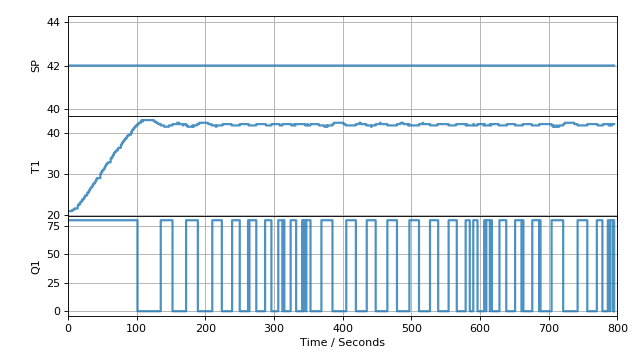

TCLab Model disconnected successfully.


In [5]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time
Umax = 80
Umin = 0

with TCLab() as lab:
    
    sources = ('SP', lambda: Tsetpoint(t)), ('T1', lambda: lab.T1), ('Q1', lab.Q1)
    h = Historian(sources)
    p = Plotter(h, tf)
    
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = Umax if T1 < Tsp else Umin # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data

## Let's Construct a More Challenging Control Objective

In [7]:
def Tsetpoint(t):
    if t <= 200:
        Tsp = 50
    elif t > 200 and t <= 300:
        Tsp = 50 - 0.10*(t-200)
    elif t > 300 and t <= 500:
        Tsp = 40
    elif t > 500 and t <= 700:
        Tsp = 40 + 0.05*(t-500)
    else:
        Tsp = 50
    return Tsp

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


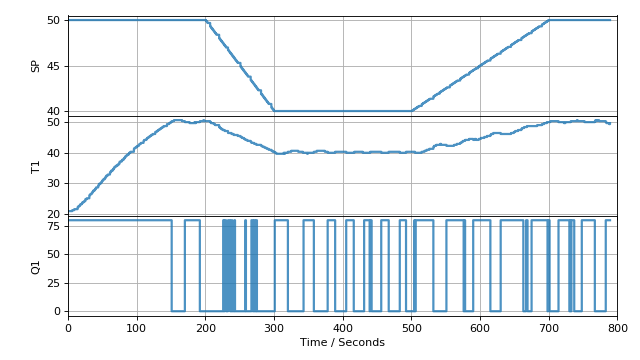

TCLab Model disconnected successfully.


In [8]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time
Umax = 80
Umin = 0

with TCLab() as lab:
    
    sources = ('SP', lambda: Tsetpoint(t)), ('T1', lambda: lab.T1), ('Q1', lab.Q1)
    h = Historian(sources)
    p = Plotter(h, tf)
    
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = Umax if T1 < Tsp else Umin # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data

In [35]:
def kounter():
    i = 0
    while True:
        yield i
        i = i + 1
        
counter1 = kounter()
counter2 = kounter()

for n in range(0,10):
    print('c1', next(counter1))
print()

for n in range(0,10):
    print('c2', next(counter2))
    
print()
for n in range(0,10):
    print('c1', next(counter1))
print()


c1 0
c1 1
c1 2
c1 3
c1 4
c1 5
c1 6
c1 7
c1 8
c1 9

c2 0
c2 1
c2 2
c2 3
c2 4
c2 5
c2 6
c2 7
c2 8
c2 9

c1 10
c1 11
c1 12
c1 13
c1 14
c1 15
c1 16
c1 17
c1 18
c1 19



## How can we incorporate complex control algorithms?

In [5]:
def relay(Qmin, Qmax):
    Q = 0
    while True:
        Tsp, T = yield Q
        Q = Qmax if T < Tsp else Qmin

In [6]:
def Tsetpoint(t):
    if t <= 200:
        Tsp = 50
    elif t > 200 and t <= 300:
        Tsp = 50 - 0.10*(t-200)
    elif t > 300 and t <= 500:
        Tsp = 40
    elif t > 500 and t <= 700:
        Tsp = 40 + 0.05*(t-500)
    else:
        Tsp = 50
    return Tsp

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


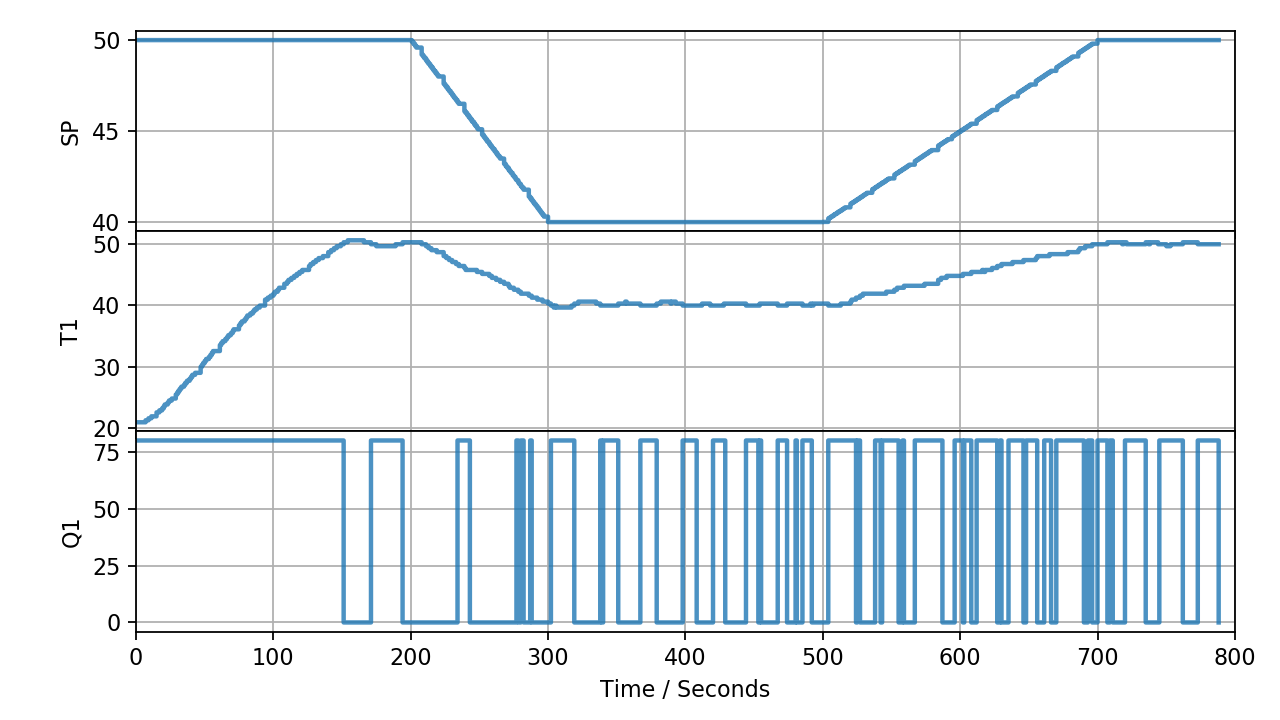

TCLab Model disconnected successfully.


In [7]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time

controller = relay(0, 80)
controller.send(None)

with TCLab() as lab:
    h = Historian([('SP', lambda: Tsetpoint(t)),
                   ('T1', lambda: lab.T1),
                   ('Q1', lab.Q1)])
    p = Plotter(h, tf)
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = controller.send([Tsp, T1])   # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data